# Transformation of variables

###  Types of transformation
1. Standardization and Normalization
2. scaling to minimum and maximum values
3. scaling to median and quantiles
4. gaussian transformation:
    a) log transformation
    b) reciprocal transformation
    c) square root transformation
    d) exponential transformation
    e) box cox transformation

### standardization

it basically bring the variables to a similar scale.
mean = 0
std = 1

(z score = (x-mean)/std)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train_titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = data[['Pclass','Age','Fare','Survived']]

In [5]:
data.head()

,Pclass,Age,Fare,Survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [6]:
data.isnull().sum()

Pclass        0
Age         177
Fare          0
Survived      0
dtype: int64

In [7]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [8]:
data.isnull().sum()

Pclass      0
Age         0
Fare        0
Survived    0
dtype: int64

In [9]:
# we can use sklearn lib for standardization
from sklearn.preprocessing import StandardScaler

In [10]:
scaler= StandardScaler()

In [11]:
#difference btw fit and fit_transform
scaled_data = scaler.fit_transform(data)

In [12]:
scaled_data

array([[ 0.82737724, -0.56573646, -0.50244517, -0.78927234],
       [-1.56610693,  0.66386103,  0.78684529,  1.2669898 ],
       [ 0.82737724, -0.25833709, -0.48885426,  1.2669898 ],
       ...,
       [ 0.82737724, -0.1046374 , -0.17626324, -0.78927234],
       [-1.56610693, -0.25833709, -0.04438104,  1.2669898 ],
       [ 0.82737724,  0.20276197, -0.49237783, -0.78927234]])

In [13]:
import matplotlib.pyplot as plt

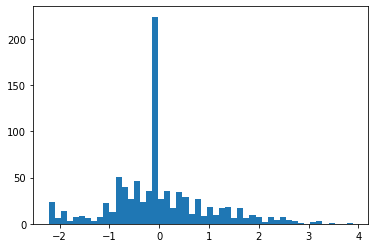

In [14]:
plt.hist(scaled_data[:,1],bins=50)#age
plt.show()

since nan value replaced with median

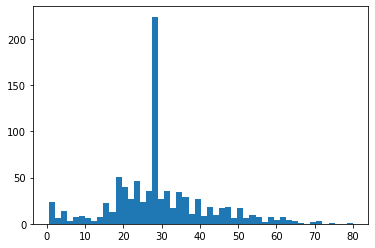

In [15]:
plt.hist(data['Age'],bins=50)#age
plt.show()

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Density'>

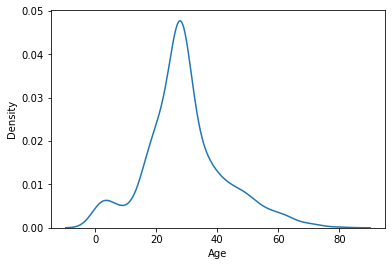

In [17]:
sns.kdeplot(data['Age'],data=data)

### Normalization
#### Min-Max scaling

this scales the values between 0 and 1. works well in CNN

scaled = (x-xmin)/(xmax-xmin)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler1 = MinMaxScaler()

In [20]:
min_max_scaled_data = scaler1.fit_transform(data)

In [21]:
min_max_scaled_data

array([[1.        , 0.27117366, 0.01415106, 0.        ],
       [0.        , 0.4722292 , 0.13913574, 1.        ],
       [1.        , 0.32143755, 0.01546857, 1.        ],
       ...,
       [1.        , 0.34656949, 0.04577135, 0.        ],
       [0.        , 0.32143755, 0.0585561 , 1.        ],
       [1.        , 0.39683338, 0.01512699, 0.        ]])

In [22]:
new_data = pd.DataFrame(min_max_scaled_data,columns=['pclass','age','fair','survived'])

In [23]:
new_data.head(10)

,pclass,age,fair,survived
0,1.0,0.271174,0.014151,0.0
1,0.0,0.472229,0.139136,1.0
2,1.0,0.321438,0.015469,1.0
3,0.0,0.434531,0.103644,1.0
4,1.0,0.434531,0.015713,0.0
5,1.0,0.346569,0.016510,0.0
6,0.0,0.673285,0.101229,0.0
7,1.0,0.019854,0.041136,0.0
8,1.0,0.334004,0.021731,1.0
9,0.5,0.170646,0.058694,1.0


<AxesSubplot:xlabel='age', ylabel='Density'>

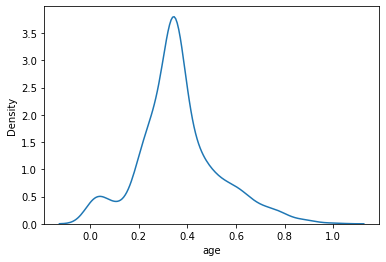

In [24]:
sns.kdeplot(new_data['age'])

### Robust scaler

used to scale the features to median and quantiles. this is basically done by subtracting median from all the observations and divide it by the IQR

scaled = (x-median(x)) / IQR

if there is skewed data, it is more efficient to use robust scaler (outliers)

In [25]:
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()

In [26]:
robust_scaled_data = scaler2.fit_transform(data)

In [27]:
robust_scaled_data

array([[ 0.        , -0.46153846, -0.3120106 ,  0.        ],
       [-2.        ,  0.76923077,  2.46124229,  1.        ],
       [ 0.        , -0.15384615, -0.28277666,  1.        ],
       ...,
       [ 0.        ,  0.        ,  0.38960398,  0.        ],
       [-2.        , -0.15384615,  0.67328148,  1.        ],
       [ 0.        ,  0.30769231, -0.29035583,  0.        ]])

In [28]:
robust_data = pd.DataFrame(robust_scaled_data,columns=['pclass','age','fair','survived'])

In [29]:
robust_data.head()

,pclass,age,fair,survived
0,0.0,-0.461538,-0.312011,0.0
1,-2.0,0.769231,2.461242,1.0
2,0.0,-0.153846,-0.282777,1.0
3,-2.0,0.538462,1.673732,1.0
4,0.0,0.538462,-0.277363,0.0


<AxesSubplot:xlabel='age', ylabel='Density'>

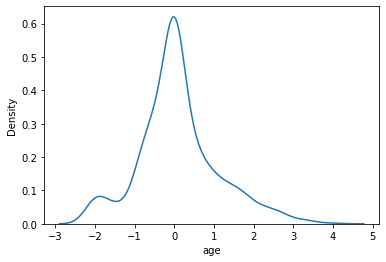

In [30]:
sns.kdeplot(robust_data['age'])

### Gaussian transformation
converting not normal distributed data to a normally distributed data.

#### 1.log transformation

for checking whether variable is normally distibuted, we use Q-Q plot

In [31]:
import scipy.stats as stats
import pylab

In [32]:
def plot(data,column):
    plt.figure(figsize = (10,5),dpi = 200)
    plt.subplot(1,2,1)
    data[column].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[column],dist = 'norm',plot = pylab)
    plt.show

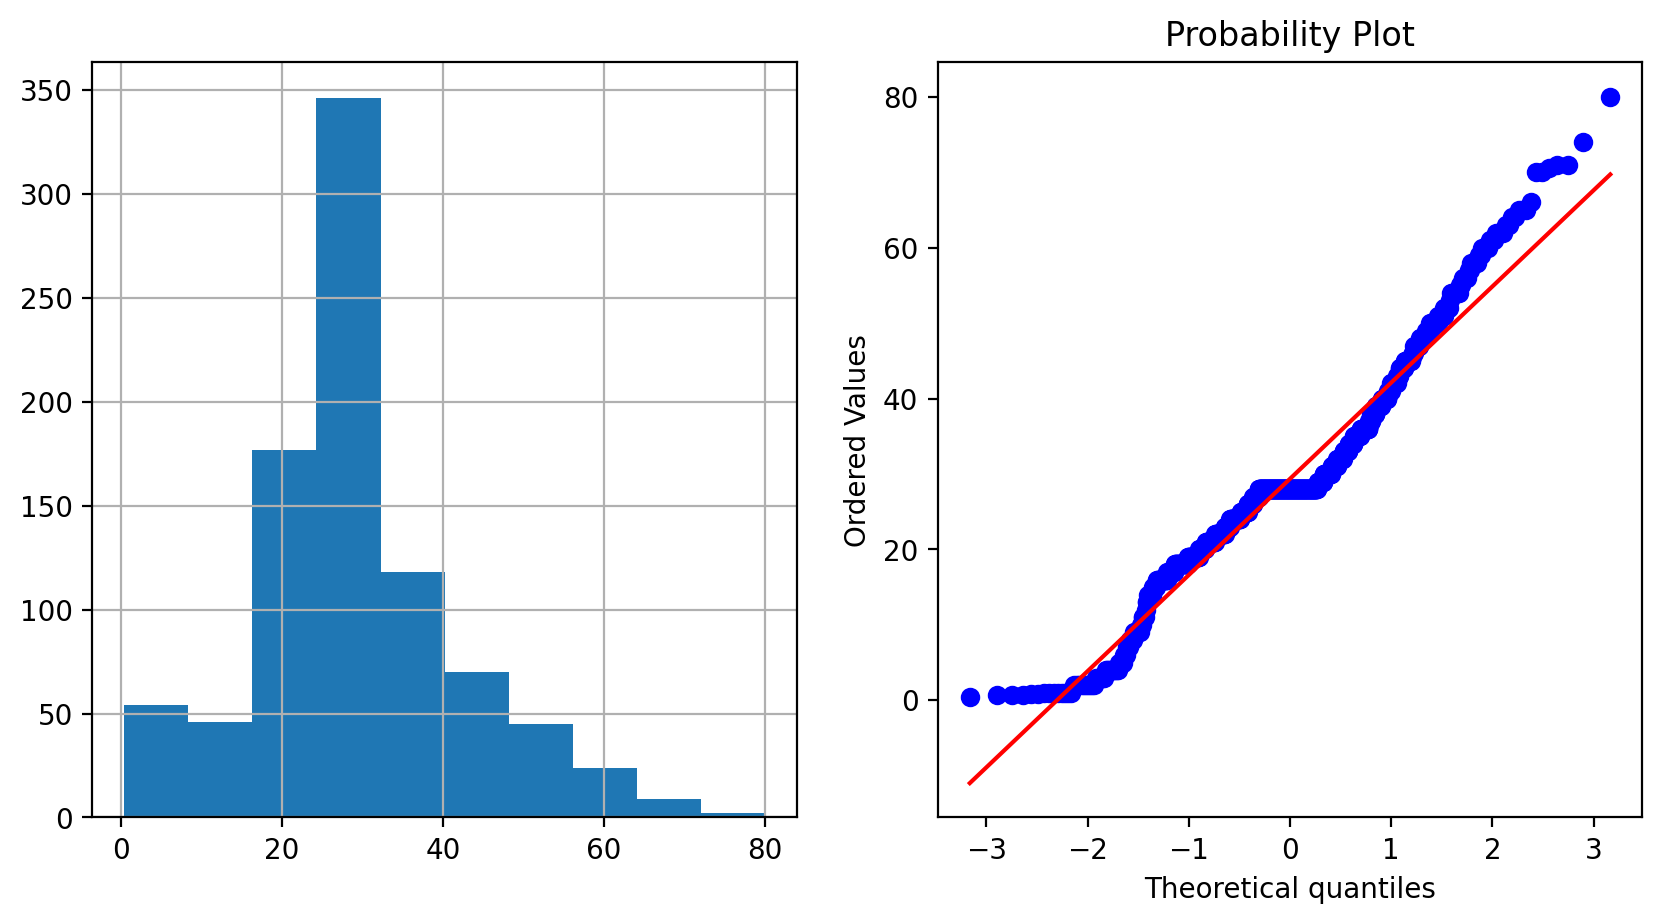

In [33]:
plot(data,'Age')

In [34]:
data['age_log'] = np.log(data['Age'])

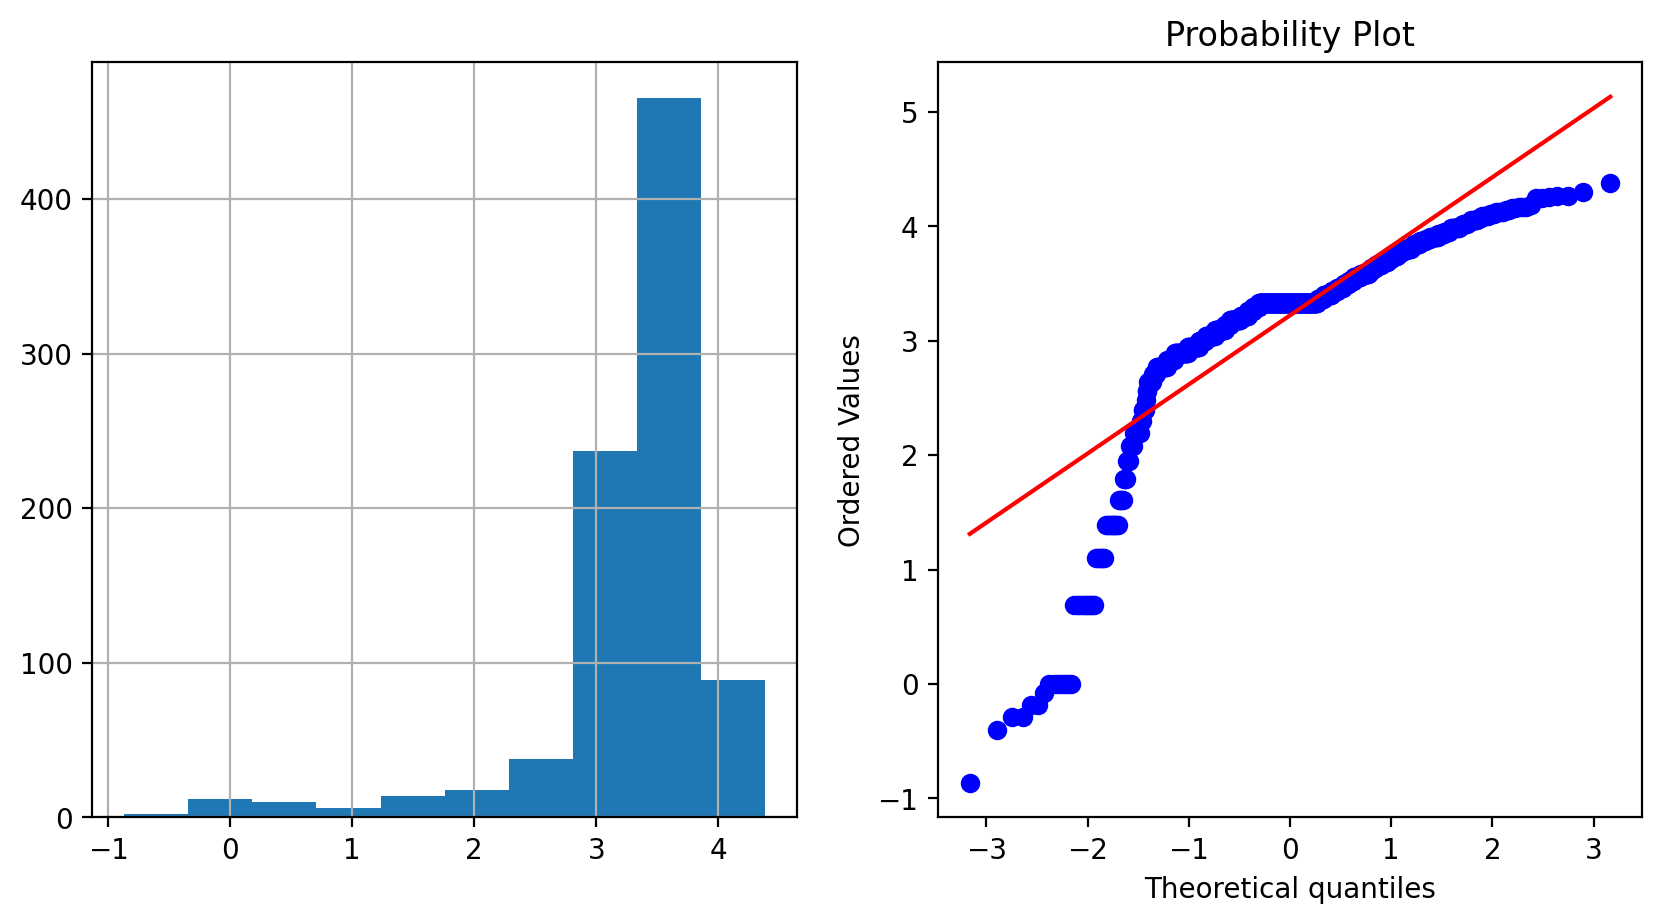

In [35]:
plot(data,'age_log')

In [57]:
data['fare_log'] = np.log(data['Fare']+1)

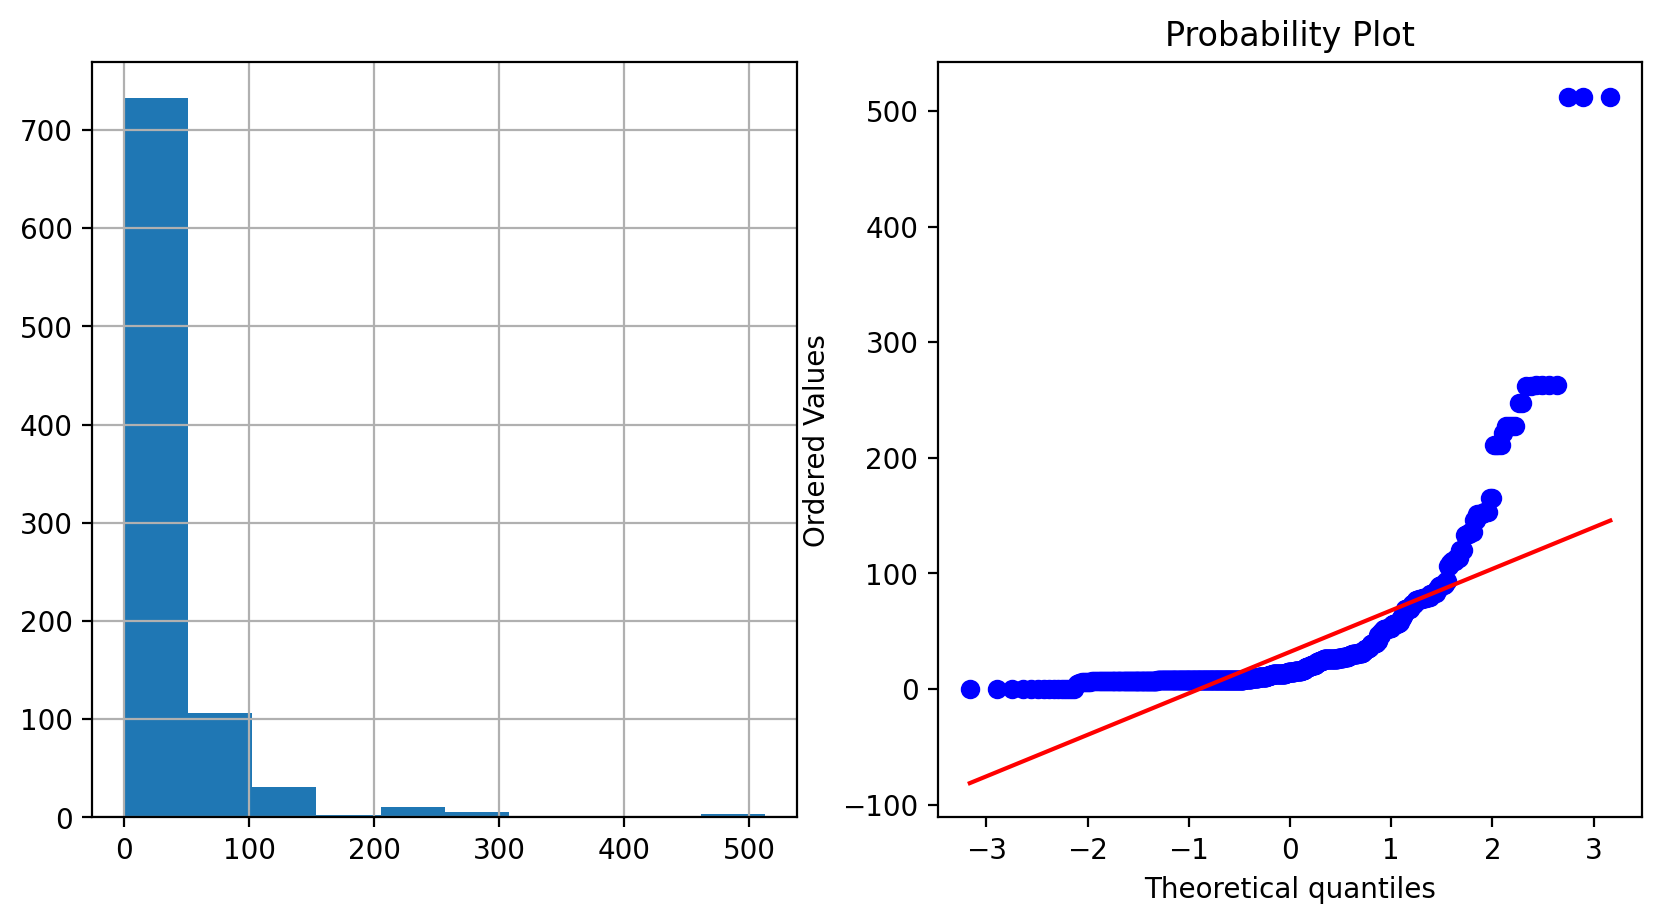

In [58]:
plot(data,'Fare')

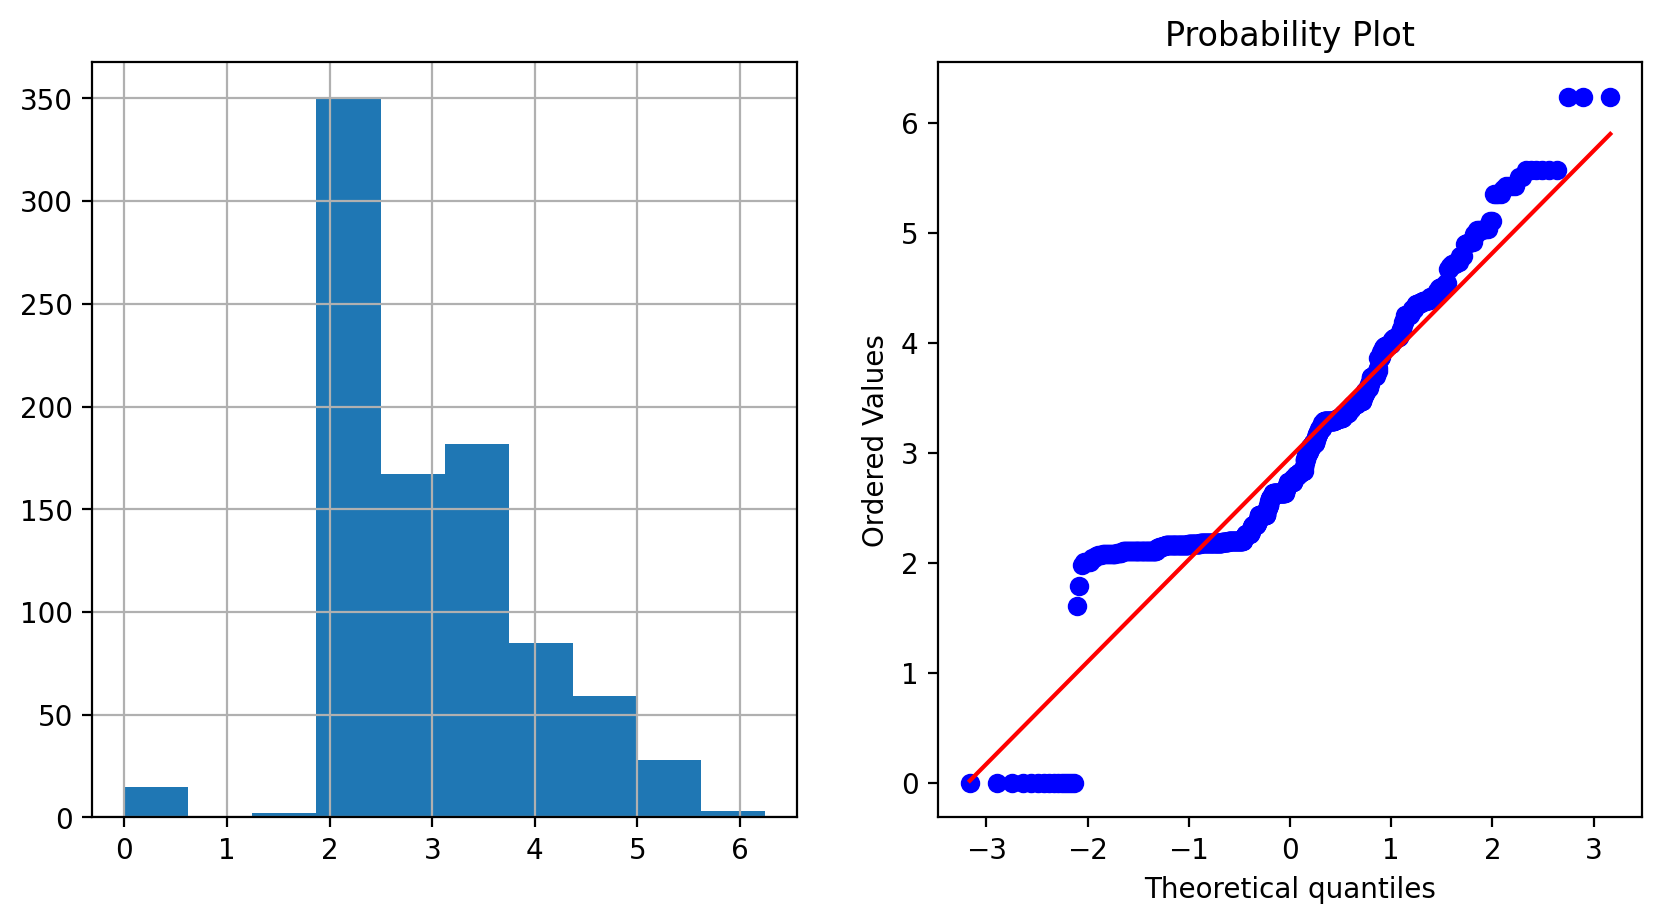

In [51]:
plot(data,'fare_log')

log transform is not suitable for age column

in fare column most of the data became normally distributed and also the skewness is handled

### Reciprocal transformation

In [36]:
data['age_reci'] = 1/data['Age']

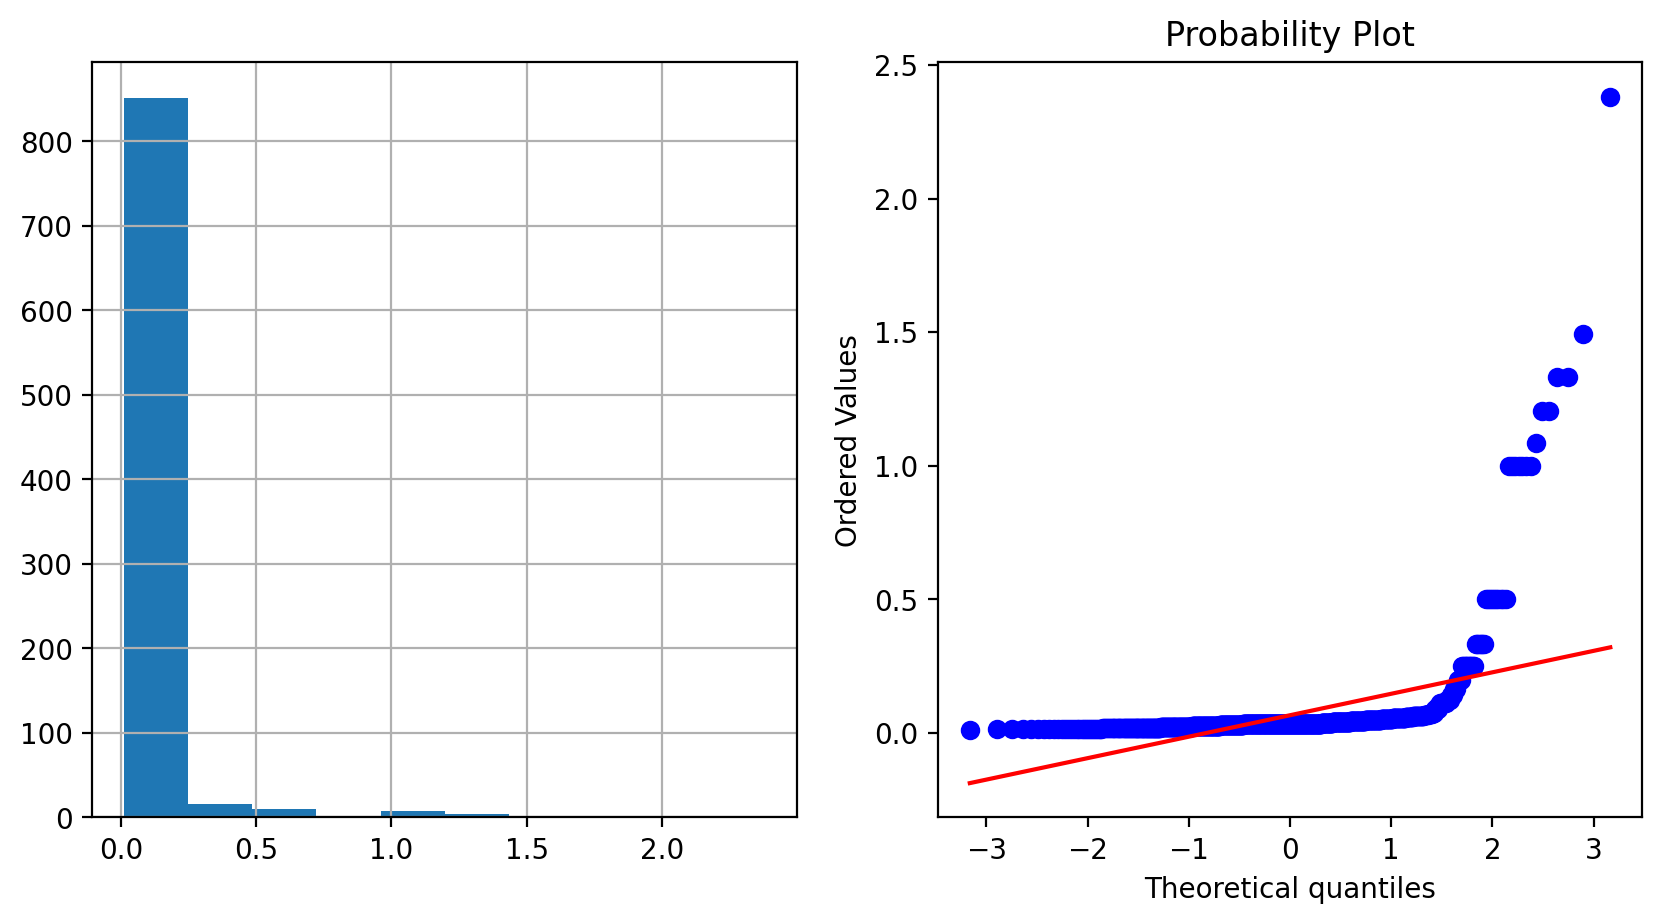

In [37]:
plot(data,'age_reci')

### square root transformation

In [38]:
data['age_square'] = data['Age']**(1/2)

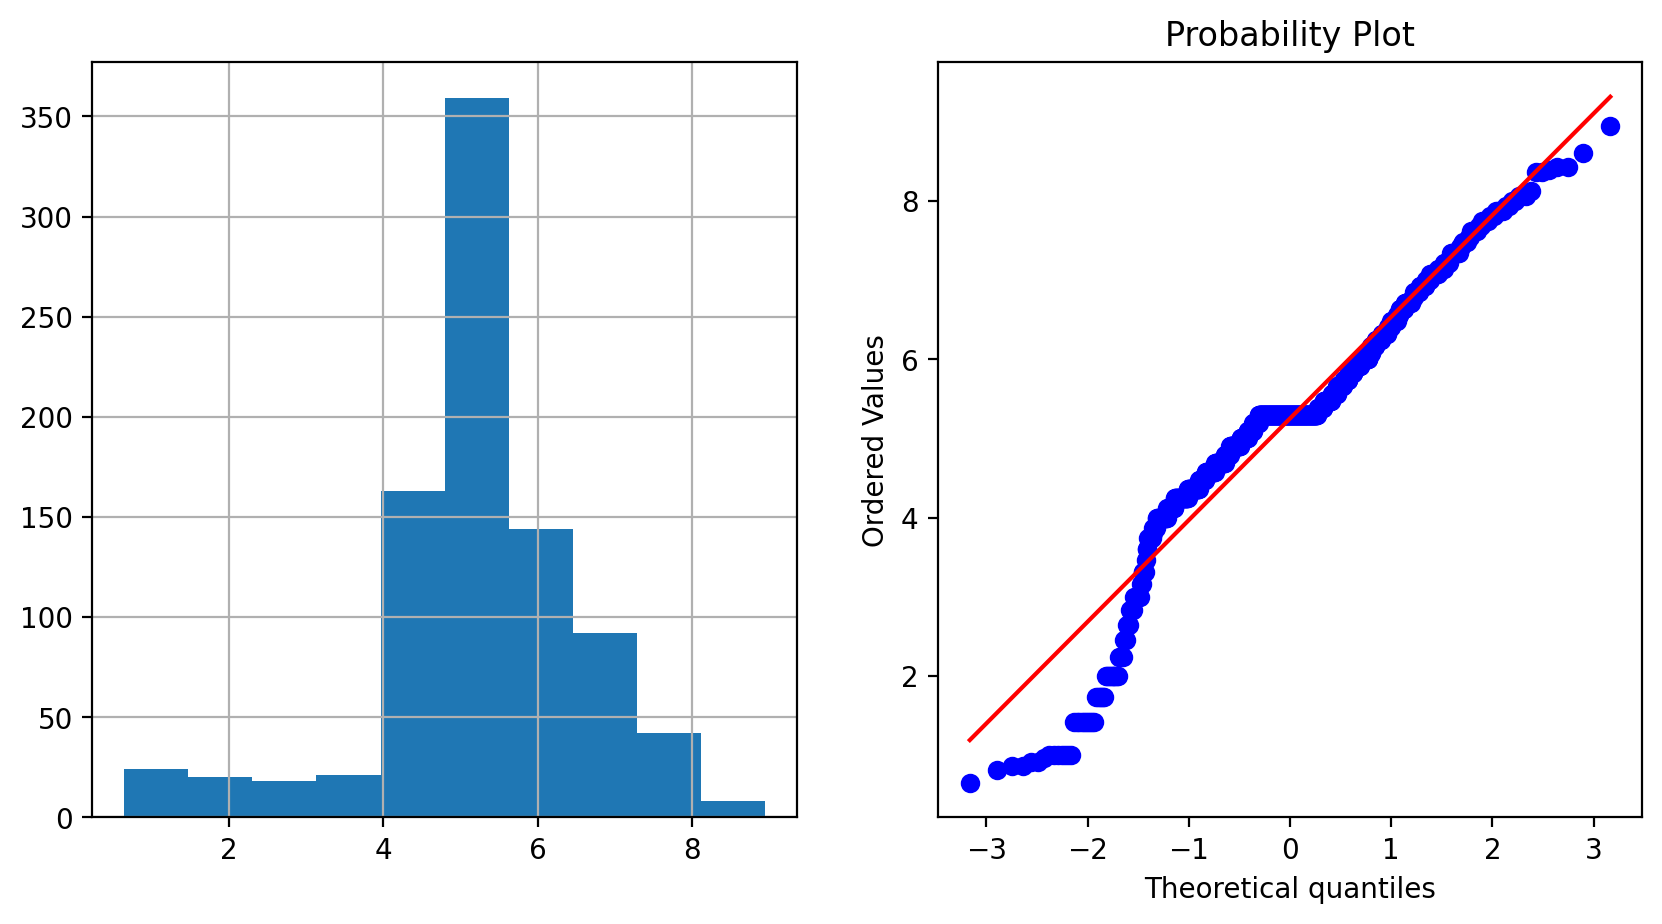

In [39]:
plot(data,'age_square')

### exponentail transformation

In [40]:
data['age_expo'] = data['Age']**(1/1.2)

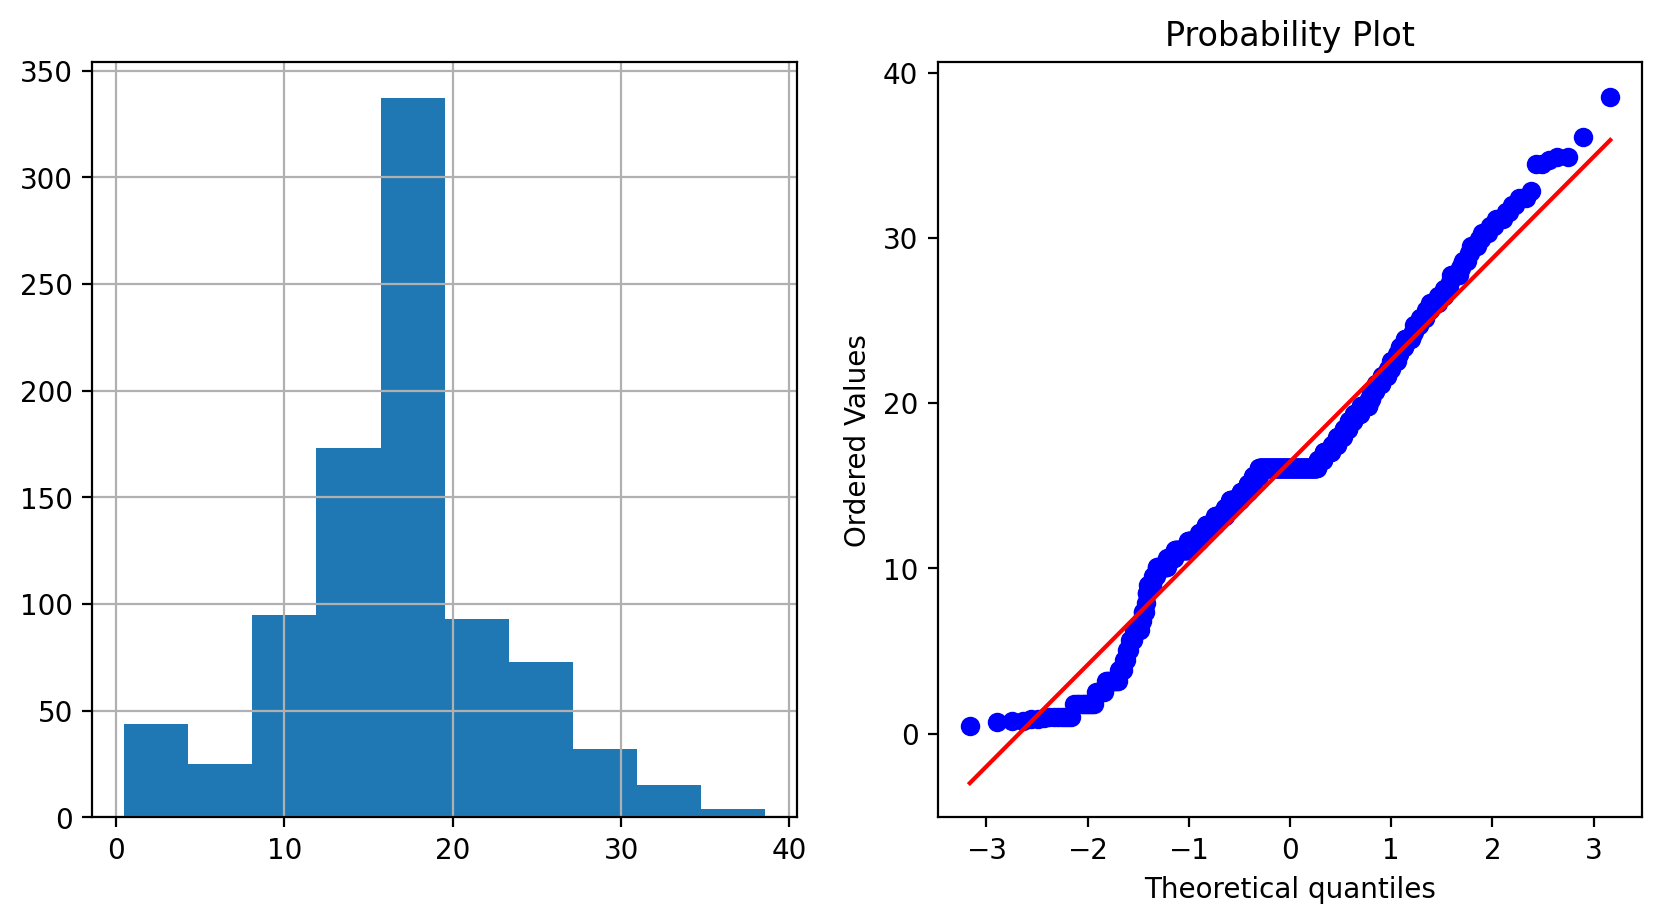

In [41]:
plot(data,'age_expo')

### box cox transformation

T(Y) = (Y exp(lambda)-1)/lambda

Y = varibale

lambda = (-5 to +5)

all values of lambda are considered and the optimal value for the given variable is selected

In [44]:
data['age_boxcox'],params = stats.boxcox(data['Age'])

In [46]:
print(params)

0.7964531473656952


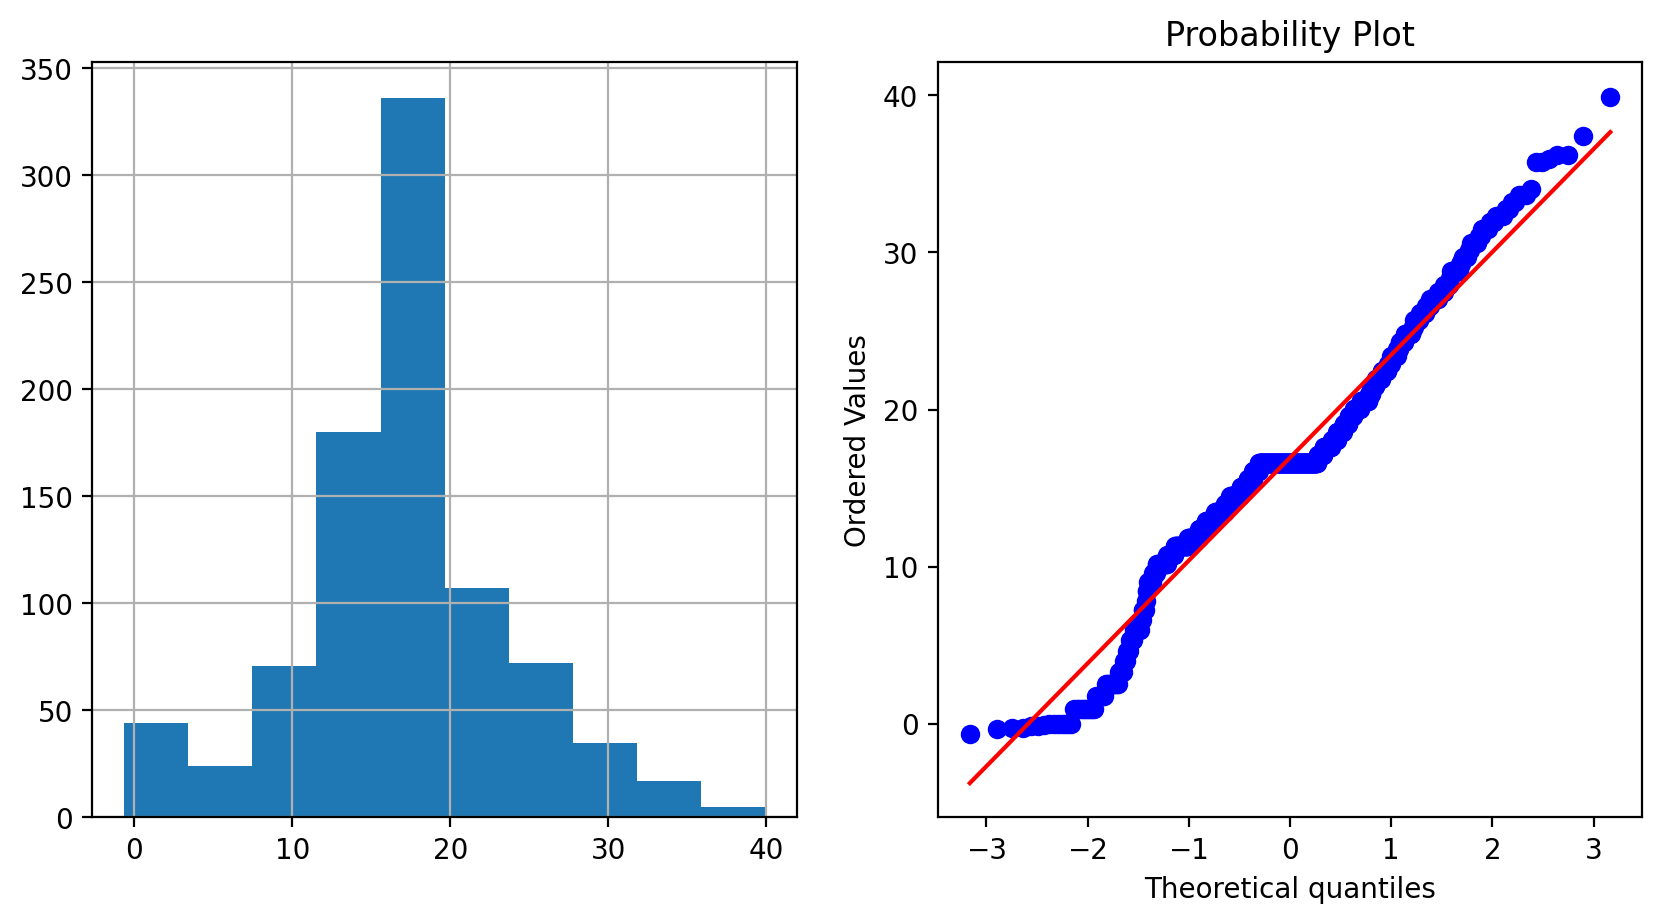

In [48]:
plot(data,'age_boxcox')

In [55]:
data['fare_boxcox'],params = stats.boxcox(data['Fare']+1)# +1 for removing negaive values

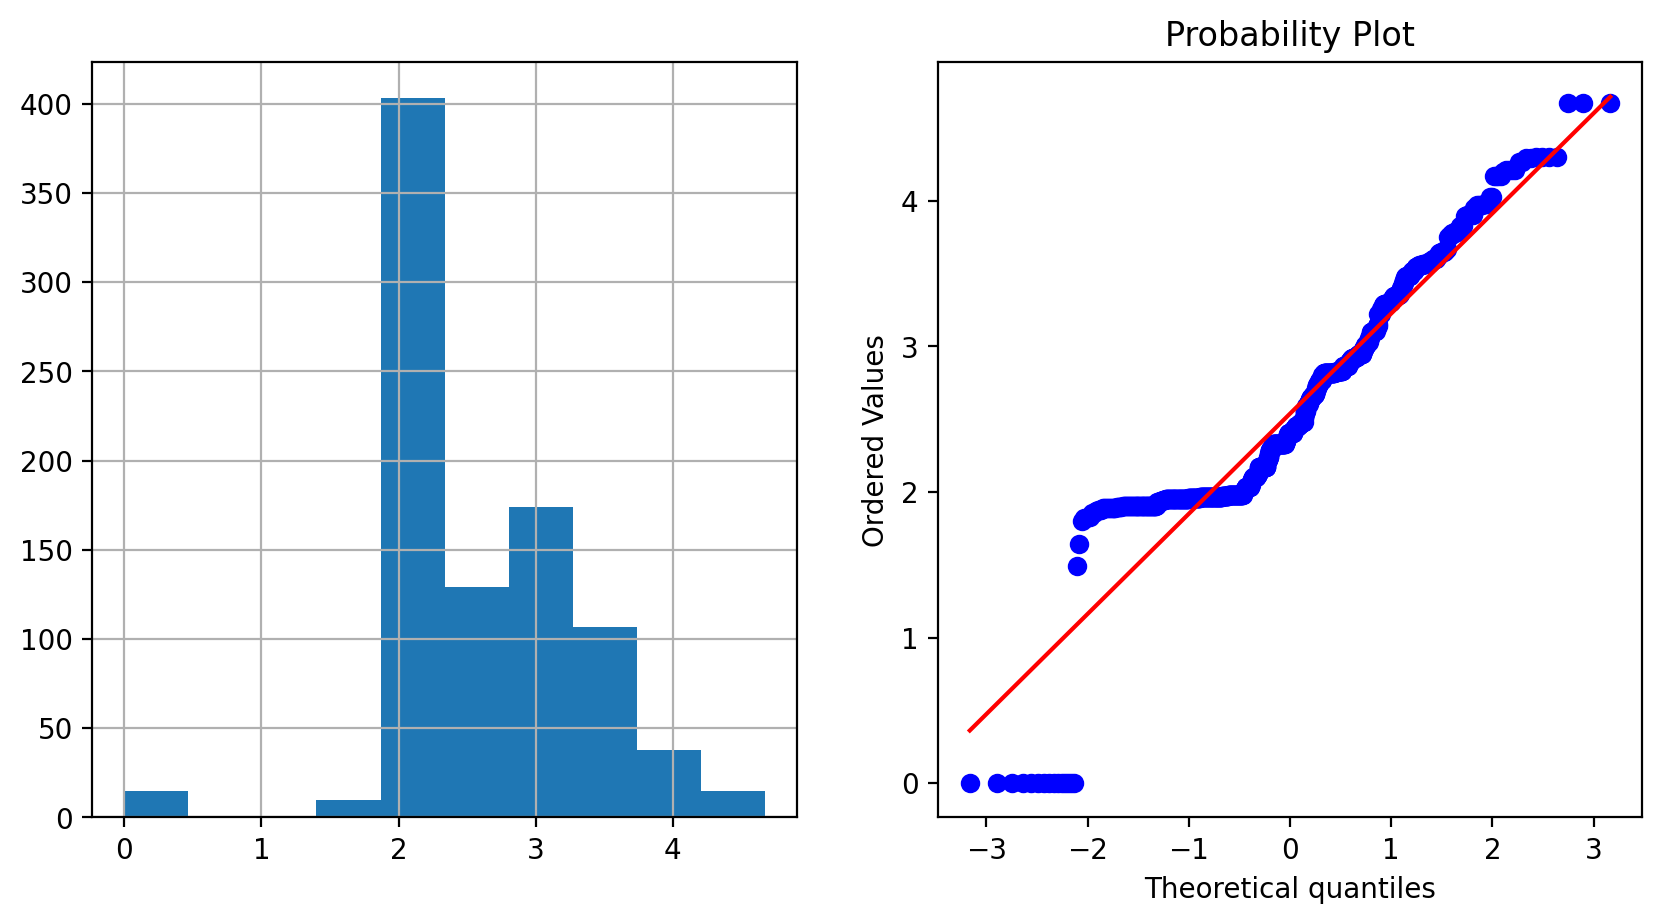

In [56]:
plot(data,'fare_boxcox')